<a href="https://colab.research.google.com/github/ericodex/TF_ml_labs/blob/master/Pedra%2C_papel%2C_tesoura_CNNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Redes Neurais Artificiais Convolucionais (RNAC) Aplicado a reconhecimento de imagens.

Pedra, papel e tesoura!

O objetivo é criar um modelo de rede neural artificial para o reconhecimento de imagens. As imagens são dos 



Autor: Eric Olieira Lima - 19/09/2019


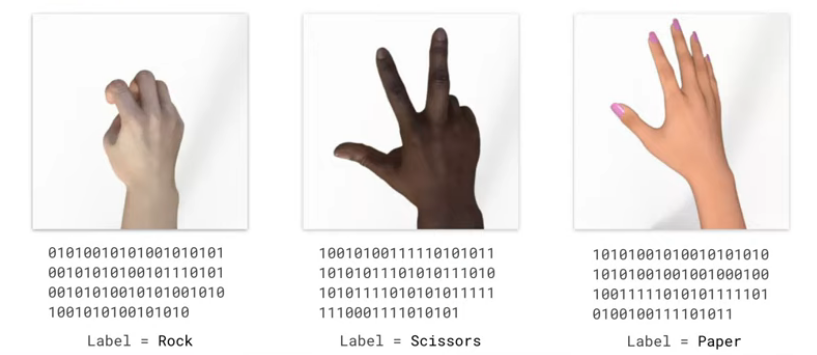# !Imagens de mãos representando pedra, tesoura e papel. (https://)



---



In [2]:
!pip install tensorflow

O código !wget na célula abaixo vai baixar e armazenar o arquivo do link em um diretório específicado. O **rps.zip** contém as imagens para o treinamento da nossa RNAC.

In [3]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
  -O /tmp/rps.zip

--2019-09-20 15:16:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   186MB/s    in 1.0s    

2019-09-20 15:16:16 (186 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



O **rps-test-set.zip** contém as imagens para testarmos nosso modelo.

In [4]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
  -O /tmp/rps-test-set.zip
  

--2019-09-20 15:16:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M   135MB/s    in 0.2s    

2019-09-20 15:16:29 (135 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]



In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


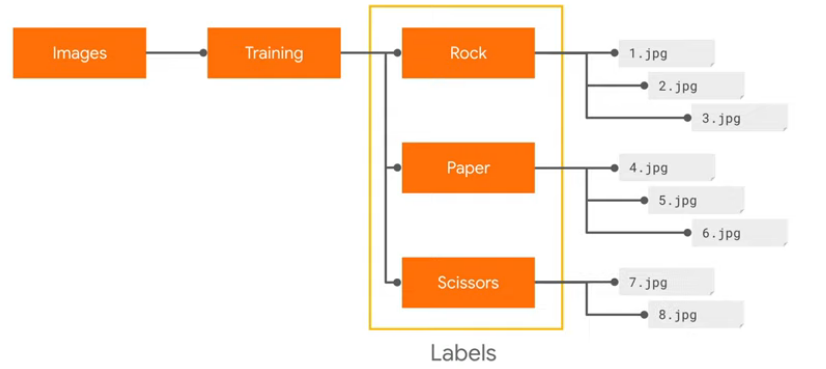

*Labels*, ou rótulos são as partes supervisionadas da *supervised learning*. E é convencionado no Tensorflow que os rótulos são definidos pela organização dos diretórios (pastas) onde os arquivos de teste do modelo estarão.

In [6]:
import re
import tensorflow_datasets.public_api as tfds

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





---

## Pré-processamento de imagem:

Redefinindo sua resolução para padronização de 150x150 pixels.

In [0]:

import tensorflow as tf
from tensorflow import keras



In [8]:
# Normatização de dados para entrada em Rede Neural Artificial

TRAINING_DIR = "/tmp/rps/"
training_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory( 
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)



Found 2520 images belonging to 3 classes.


In [9]:
# 

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
      VALIDATION_DIR,
      target_size=(150,150),
      class_mode='categorical'
)

Found 372 images belonging to 3 classes.




---
# Camadas da Rede Neural Artificial Convolucional:


In [0]:
# Modelo de organização de camadas:

model = tf.keras.models.Sequential([

  # 4 Camadas de Convolutions e MaxPooling                               
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  # Achatar os resultados para serem inseridos na Rede Neural Profunda.
  # Flatten the results to feed into a Deep Neural Net (DNN)
  tf.keras.layers.Flatten(),

  # Descarta parte dos neurônios para aumentar a eficiência.
  tf.keras.layers.Dropout(0,5),
  
  # 512 neurônios camada profunda (Hidden layer)
  tf.keras.layers.Dense(512, activation='relu'),

  # A saída são 3 neurônios, porquê são três os resultados (pedra, papel, tesoura)
  tf.keras.layers.Dense(3, activation='softmax')
])

In [40]:
# Para imprimir um resumo do modelo:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            



---
# Compilar Rede Neural Profunda


In [0]:
# Compilar

model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
# Treinar o Modelo (aproximadamente 50 minutos de execução)

history = model.fit_generator(train_generator, epochs=15,
                              validation_data = validation_generator,
                              verbose=1)

Epoch 1/15
79/79 [==============================] - 178s 2s/step - loss: 0.0307 - acc: 0.9881 - val_loss: 2.2458 - val_acc: 0.7339
Epoch 2/15
79/79 [==============================] - 179s 2s/step - loss: 0.1811 - acc: 0.9802 - val_loss: 2.9664 - val_acc: 0.7231
Epoch 3/15
79/79 [==============================] - 188s 2s/step - loss: 0.8136 - acc: 0.9861 - val_loss: 2.9283 - val_acc: 0.7634
Epoch 4/15
79/79 [==============================] - 192s 2s/step - loss: 0.0527 - acc: 0.9877 - val_loss: 1.6656 - val_acc: 0.5887
Epoch 5/15
79/79 [==============================] - 196s 2s/step - loss: 0.0099 - acc: 0.9980 - val_loss: 3.5487 - val_acc: 0.7151
Epoch 6/15
79/79 [==============================] - 195s 2s/step - loss: 2.0028e-06 - acc: 1.0000 - val_loss: 4.1326 - val_acc: 0.7097
Epoch 7/15
79/79 [==============================] - 196s 2s/step - loss: 6.6234e-08 - acc: 1.0000 - val_loss: 5.5309 - val_acc: 0.6989
Epoch 8/15
79/79 [==============================] - 195s 2s/step - loss: 0.

In [0]:
# 12:38 - Início



---
# Evitar o Overfitting

"Sobre-ajuste ou sobreajuste (do inglês: overfitting) é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados."

Abaixo o resultado de um Overfitting, que é quando a acuracidade do modelo sobre a validação dos dados atinge um pico depois de treinar por algumas epochs e depois decresce.




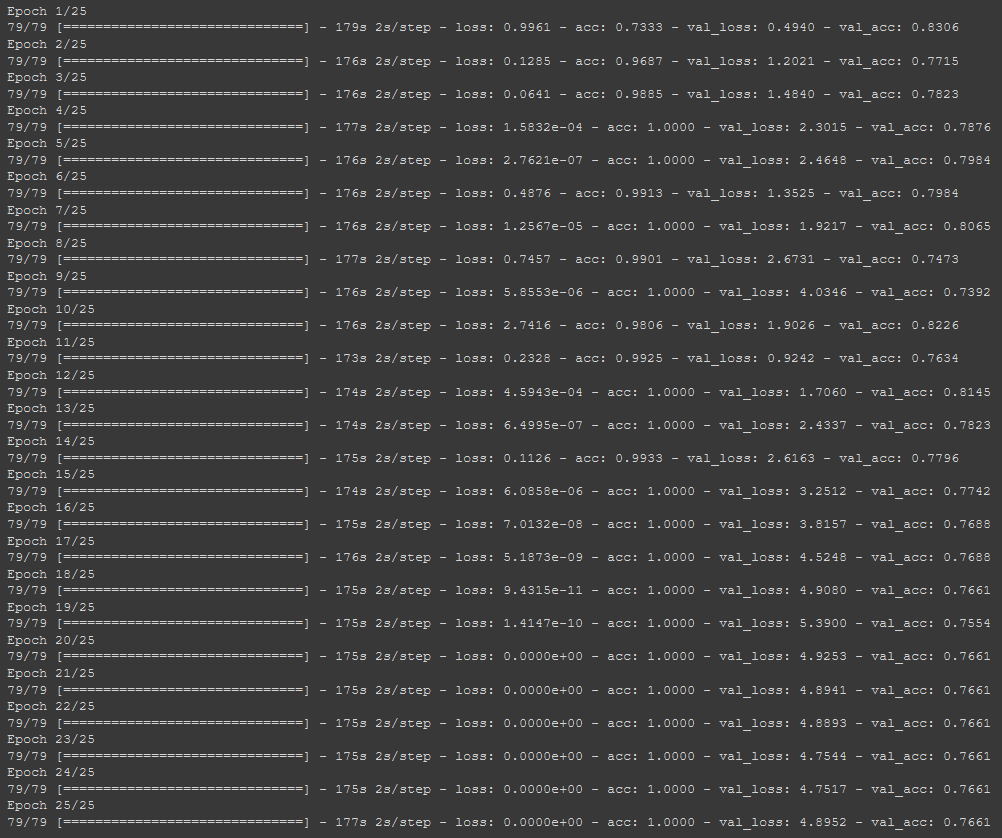

In [16]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip \
  -O /tmp/rps-validação.zip


--2019-09-20 17:15:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6623597 (6.3M) [application/zip]
Saving to: ‘/tmp/rps-validação.zip’

/tmp/rps-validação. 100%[===================>]   6.32M  --.-KB/s    in 0.1s    

2019-09-20 17:15:15 (48.5 MB/s) - ‘/tmp/rps-validação.zip’ saved [6623597/6623597]



In [0]:
local_zip = '/tmp/rps-validação.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rsp-validação/rsp-validação')
zip_ref.close()

In [27]:
TEST_VALIDATION_DIR = "/tmp/rsp-validação/"
training_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory( 
    TEST_VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 33 images belonging to 1 classes.


In [0]:
# To Avoid Overfit

classes = model.predict(train_generator, batch_size=10)



In [39]:

print(classes[0][0])



8.503391e-30
